In [1]:
!git clone -b tpu https://github.com/lattice-ai/DeepLabV3-Plus
%cd DeepLabV3-Plus

fatal: destination path 'DeepLabV3-Plus' already exists and is not an empty directory.
/kaggle/working/DeepLabV3-Plus


In [2]:
!git pull

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 6 (delta 5), reused 6 (delta 5), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/lattice-ai/DeepLabV3-Plus
   6bdede5..78d2c12  tpu        -> origin/tpu
Updating 6bdede5..78d2c12
Fast-forward
 deeplabv3plus/datasets/tfrecords/tfrecord_dataset.py | 2 ++
 1 file changed, 2 insertions(+)


In [3]:
from deeplabv3plus.datasets import TFRecordDataset

In [4]:
import os

import tensorflow as tf
from kaggle_datasets import KaggleDatasets

In [5]:
GCS_PATH = KaggleDatasets().get_gcs_path('human-segmentation-tfrecords')
print(GCS_PATH)

gs://kds-15ddbb4886a014c7982845e3ab2128ec2063798656057465e4ea2757


In [6]:
TRAIN_TFRECORDS = tf.io.gfile.glob(
    os.path.join(
        GCS_PATH,
        'human-segmentation-tfrecords/human-segmentation-train/*.tfrec'
    )
)

print('Number of TFRecord Files:', len(TRAIN_TFRECORDS))

Number of TFRecord Files: 111


In [7]:
tfrecord_dataset = TFRecordDataset(tfrecords=TRAIN_TFRECORDS,
                                   image_size=512,
                                   apply_flips=True,
                                   apply_jitter=False)

<ParallelMapDataset shapes: ((512, 512, 3), (512, 512, 1)), types: (tf.float32, tf.float32)>


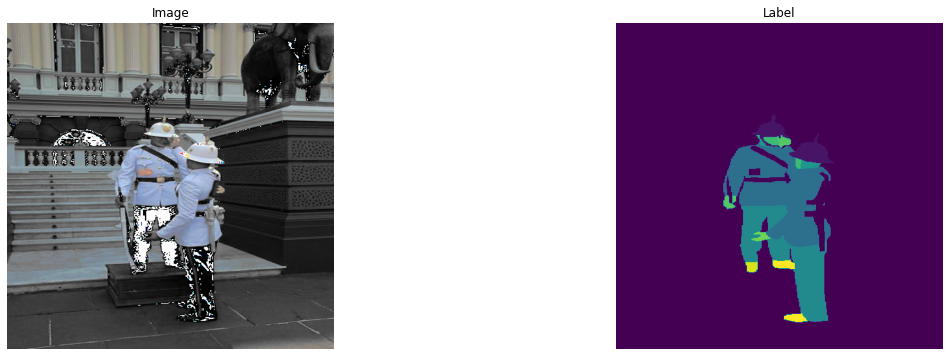

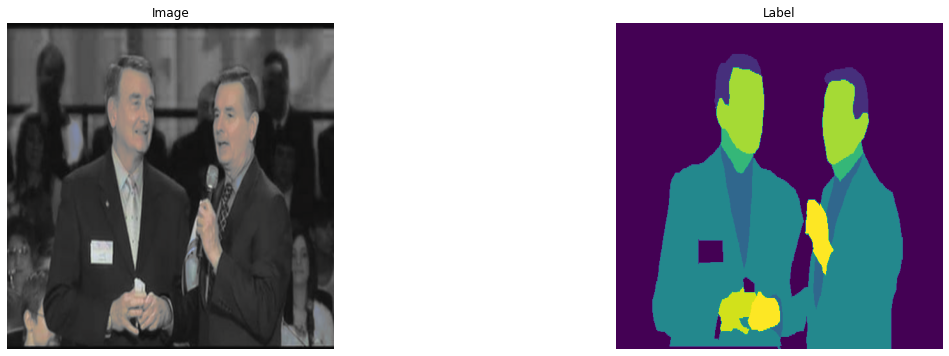

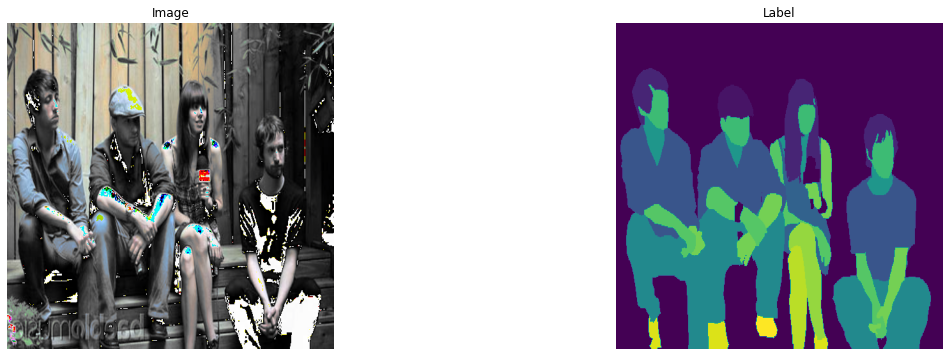

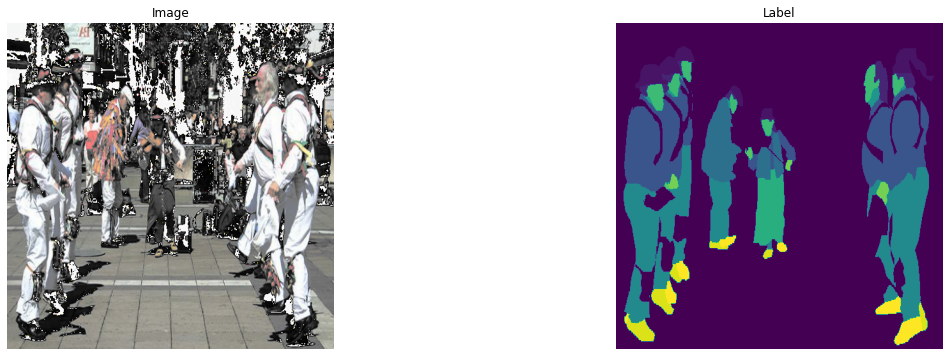

In [8]:
tfrecord_dataset.summary(visualize=True)